In [1]:
# Update sklearn to prevent version mismatches
#!pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
#!pip install joblib

In [3]:
import pandas as pd

KNN

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [5]:
df['koi_disposition'].unique()

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [6]:
df.shape

(6991, 41)

# Select your features (columns)

In [7]:
# Set features. This will also be used as your x values.
Actual_Results = df["koi_disposition"]
Feature_Set = df.drop("koi_disposition", axis=1)
#Feature_Set
Feature_Names = Feature_Set.columns
Feature_Names

Index(['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
       'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk',
       'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1',
       'koi_impact_err2', 'koi_duration', 'koi_duration_err1',
       'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2',
       'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg',
       'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1',
       'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

In [8]:
#using Actual_Results as the y-values
#Actual_Results
X=Feature_Set
y=Actual_Results

In [9]:
#identifying features 
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
model.feature_importances_

array([0.13616404, 0.17416772, 0.12965972, 0.05192906, 0.01687405,
       0.0123212 , 0.01282563, 0.01275791, 0.02251576, 0.02046901,
       0.0128661 , 0.01176213, 0.01074313, 0.01697631, 0.02743734,
       0.03028091, 0.01796399, 0.01284148, 0.01137336, 0.01280781,
       0.01077249, 0.00980621, 0.01493911, 0.00899298, 0.00910356,
       0.00819508, 0.03158437, 0.01032847, 0.01006996, 0.02256115,
       0.01498323, 0.01025042, 0.0102301 , 0.0132429 , 0.00828557,
       0.0117226 , 0.0087775 , 0.01151053, 0.01001864, 0.00988847])

In [10]:
# Store the top 10 features as a series, using the column headers as the index
feat_imp = pd.Series(model.feature_importances_, index=X.columns).nlargest(10)
feat_imp

koi_fpflag_ss        0.174168
koi_fpflag_nt        0.136164
koi_fpflag_co        0.129660
koi_fpflag_ec        0.051929
koi_model_snr        0.031584
koi_duration_err2    0.030281
koi_duration_err1    0.027437
koi_steff_err1       0.022561
koi_time0bk_err1     0.022516
koi_time0bk_err2     0.020469
dtype: float64

In [11]:
# Set features based on feature importances
X = df[feat_imp.index]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [14]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)

# Scale training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Lists to store training and testing scores
train_scores = []
test_scores = []

# Loop through to find the best k value
for k in range (5, 35, 3):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train: {train_score:.3f}, Test: {test_score:.3f}")

k: 5, Train: 0.897, Test: 0.858
k: 8, Train: 0.884, Test: 0.856
k: 11, Train: 0.872, Test: 0.858
k: 14, Train: 0.873, Test: 0.856
k: 17, Train: 0.870, Test: 0.860
k: 20, Train: 0.871, Test: 0.857
k: 23, Train: 0.867, Test: 0.861
k: 26, Train: 0.868, Test: 0.858
k: 29, Train: 0.863, Test: 0.862
k: 32, Train: 0.863, Test: 0.858


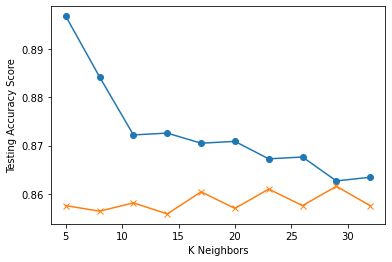

In [16]:
import matplotlib.pyplot as plt

# Plot training and testing scores
plt.plot(range(5, 35, 3), train_scores, marker='o')
plt.plot(range(5, 35, 3), test_scores, marker='x')
plt.xlabel("K Neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()

# Current best k value looks like k=17

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [17]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV

# Initialize new classifer outside of loop
knn2 = KNeighborsClassifier()

# Create the GridSearchCV model
param_grid = dict(n_neighbors=list(range(5, 55)))

best_model = GridSearchCV(knn2, param_grid, cv=100, scoring='accuracy', verbose=1)

In [19]:
# Train the model with GridSearch
best_model.fit(X_train_scaled, y_train)

Fitting 100 folds for each of 50 candidates, totalling 5000 fits


GridSearchCV(cv=100, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                         16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                         26, 27, 28, 29, 30, 31, 32, 33, 34, ...]},
             scoring='accuracy', verbose=1)

In [20]:
print(best_model.best_params_)
print(best_model.best_score_)

{'n_neighbors': 44}
0.858454281567489


In [21]:
# Make predictions
grid_predictions = best_model.predict(X_test_scaled)
df_grid = pd.DataFrame({"Actual":y_test, "Predicted":grid_predictions})
df_grid.head()

,Actual,Predicted
3750,CONFIRMED,CONFIRMED
4576,CANDIDATE,CANDIDATE
4578,FALSE POSITIVE,FALSE POSITIVE
310,CONFIRMED,CONFIRMED
2,FALSE POSITIVE,FALSE POSITIVE


In [22]:
# Score the model
best_model.score(X_test_scaled, y_test)

0.8638443935926774

# Save the Model

In [23]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'knn1.sav'
joblib.dump(best_model, filename)

['knn1.sav']